In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [2]:
# combo_ring = pd.read_csv('../dataset/PyRadiomics_files/radiomics_combo_ring.csv')
lesion = pd.read_csv('../dataset/PyRadiomics_files/radiomics_lesion.csv')

In [3]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
dp = data_pd[['image_id', 'dx']]
dp

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [5]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032215'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025277'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029819'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0034047'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029609'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025061'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028361'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0026042'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030687'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025987'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030006'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0031070'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028110'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033377'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033031'].index, inplace = True)

In [6]:
lesion

,image_id,dx,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0027419,bkl,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ISIC_0025030,bkl,192.0,217.0,5.409632e+09,4.369942,13.0,3.540864,250.0,204.184127,...,728.729959,0.000604,6.710587,0.407631,9.897791,3.385021,0.000121,1517.958114,0.023034,0.177788
2,ISIC_0026769,bkl,105.0,192.0,2.588999e+08,5.874022,59.0,1.765561,212.0,147.007357,...,1229.063272,0.001027,7.489928,0.568801,2.107322,0.149914,0.003139,2997.610353,0.168758,5.490538
3,ISIC_0025661,bkl,79.0,169.0,2.307388e+08,5.860003,46.0,2.351846,220.0,116.413229,...,1583.524561,0.000653,7.574148,0.554173,2.446843,0.091326,0.002431,5165.659406,0.078868,9.165628
4,ISIC_0031633,bkl,136.0,212.0,2.066242e+09,5.679751,41.0,2.811163,229.0,179.691068,...,998.796114,0.000971,8.342909,0.322720,17.334793,0.347983,0.000902,1594.235155,0.075273,1.806496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,ISIC_0033084,akiec,135.0,202.0,1.920089e+09,5.562589,44.0,1.886217,239.0,167.011429,...,657.540211,0.001365,7.895817,0.391249,9.432622,0.930090,0.000610,1953.540462,0.082483,0.952750
9995,ISIC_0033550,akiec,125.0,200.0,2.621105e+09,5.757204,45.0,2.209660,225.0,165.310586,...,1024.403900,0.000705,8.123790,0.385832,9.842129,0.612577,0.000555,2048.448485,0.075306,1.049169
9996,ISIC_0033536,akiec,149.0,203.0,3.442482e+09,5.317382,31.0,2.566600,226.0,177.223965,...,884.973606,0.000609,7.731134,0.387643,8.827970,1.048729,0.000350,1720.699298,0.051668,0.591937
9997,ISIC_0032854,akiec,135.0,194.0,1.034287e+09,5.421503,36.0,2.192556,212.0,165.167821,...,693.060344,0.001359,7.428797,0.469631,4.196538,0.679602,0.000938,1368.693240,0.094541,0.999094


In [8]:
# lesion_combo_ring['dx_y']

In [81]:
X = lesion.drop(['image_id', 'dx'], axis = 1)
# dp = data_pd[['image_id', 'dx']]
# print(dp)
y = lesion['dx']

In [10]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [ ]:
# from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# # Initializing the RandomOverSampler object with a specified random_state for reproducibility.
# ROS = RandomOverSampler(random_state = 42)

# # This method generates a balanced dataset by oversampling the minority class
# x_resampled, y_resampled = ROS.fit_resample(X, y)


In [ ]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# x_resampled, y_resampled = smt.fit_resample(X, y)


In [31]:
x_resampled.isnull().sum()


original_firstorder_10Percentile                      0
original_firstorder_90Percentile                      0
original_firstorder_Energy                            0
original_firstorder_Entropy                           0
original_firstorder_InterquartileRange                0
original_firstorder_Kurtosis                          0
original_firstorder_Maximum                           0
original_firstorder_Mean                              0
original_firstorder_MeanAbsoluteDeviation             0
original_firstorder_Median                            0
original_firstorder_Minimum                           0
original_firstorder_Range                             0
original_firstorder_RobustMeanAbsoluteDeviation       0
original_firstorder_RootMeanSquared                   0
original_firstorder_Skewness                          0
original_firstorder_TotalEnergy                       0
original_firstorder_Uniformity                        0
original_firstorder_Variance                    

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # calculate VIF for each feature

# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(lesion_ring.values, i) for i in range(lesion_ring.shape[1])]

# vif["features"] = lesion_ring.columns

# # print VIF values

# print(vif)

In [ ]:
# from sklearn.feature_selection import SelectKBest

# from sklearn.feature_selection import f_regression

# # define number of features to keep

# k = 30
# lr = lesion_ring.drop(['image_id'], axis = 1)
# # perform feature selection

# X_new = SelectKBest(f_regression, k=k).fit_transform(lr, y)

# # get feature names of selected features

# selected_features = lr.columns[SelectKBest(f_regression, k=k).fit(lr, y).get_support()]

# # print selected features

# print(selected_features)

In [ ]:
# xx = x_resampled[selected_features]
# print(xx.head())

In [11]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_resampled, y_resampled = smt.fit_resample(X_train_n, y_train_n)


In [33]:
# x_resampled_n, y_resampled_n = ROS.fit_resample(X_train_n, y_train_n)


In [17]:
# x_resampled['dx_y']

In [ ]:

x_resampled, y_resampled = smt.fit_resample(X_train_n, y_train_n)

#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(x_resampled)
X_test_scaled_n = sc.transform(X_test_n)

In [ ]:


# #scaling and centering the data
# sc = StandardScaler()
# X_train_scaled_n = sc.fit_transform(X_train_n)
# X_test_scaled_n = sc.transform(X_test_n)

In [35]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [ ]:
svm.fit(X_train_scaled_n,y_resampled.values)


In [24]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# y_pretrain_n =svm.predict(x_val_n)

# accuracy_score(y_val_n, y_pretrain_n)


In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(svm, X_train_scaled_n, y_resampled_n, cv = 500, scoring='accuracy')


In [ ]:
print(scores)

1800 1800 200 200
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.67      1.00      0.80       134
           6       0.00      0.00      0.00         3

    accuracy                           0.67       200
   macro avg       0.10      0.14      0.11       200
weighted avg       0.45      0.67      0.54       200



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

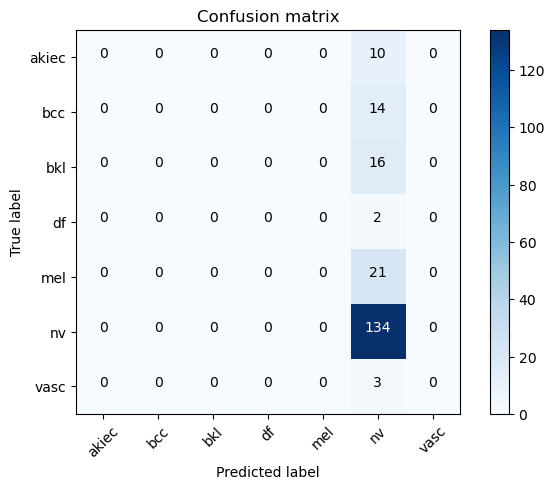

In [ ]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf_lession_ring50.png', dpi = 100)
plt.show()

In [17]:
clf = RandomForestClassifier( random_state=42)

In [20]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

In [38]:
clf.fit(X_train_scaled_n, y_train_n.values)


RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train_scaled_n, y_resampled.values)


ValueError: Found input variables with inconsistent numbers of samples: [37520, 46900]

0.8432835820895522
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1346
           1       0.85      0.90      0.88      1360
           2       0.75      0.74      0.75      1315
           3       0.94      0.99      0.97      1313
           4       0.75      0.76      0.75      1328
           5       0.77      0.57      0.66      1344
           6       0.93      0.98      0.96      1374

    accuracy                           0.84      9380
   macro avg       0.84      0.84      0.84      9380
weighted avg       0.84      0.84      0.84      9380



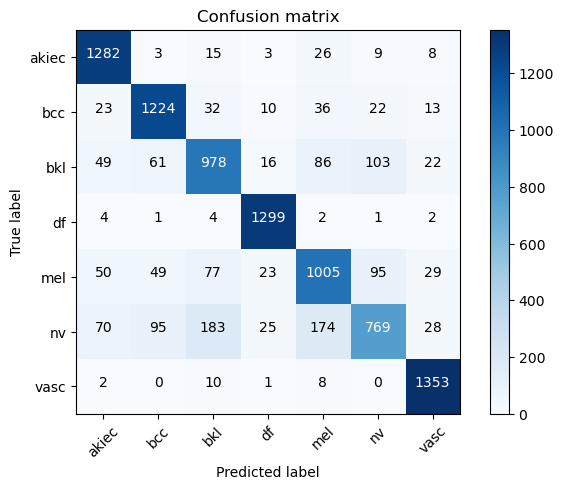

In [39]:
# x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
# print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(X_test_scaled_n)
print(accuracy_score(y_test_n, y_pre_nn))
xp = confusion_matrix(y_test_n,y_pre_nn)
print(classification_report(y_test_n, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
plt.show()

[[1282    3   15    3   26    9    8]
 [  23 1224   32   10   36   22   13]
 [  49   61  978   16   86  103   22]
 [   4    1    4 1299    2    1    2]
 [  50   49   77   23 1005   95   29]
 [  70   95  183   25  174  769   28]
 [   2    0   10    1    8    0 1353]]


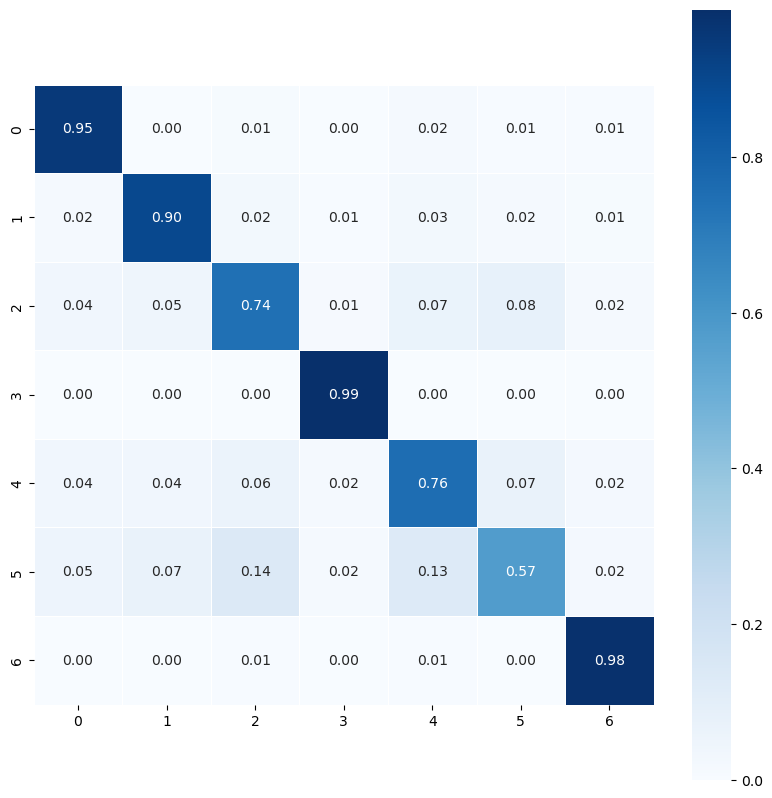

In [40]:
cm = confusion_matrix(y_test_n, y_pre_nn)
print(cm)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues');


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3,4,5,6]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test_n)==l,
                                                      np.array(y_pre_nn)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


In [28]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


,class,sensitivity,specificity
0,0,0.960248,0.079365
1,1,0.937764,0.057692
2,2,0.877494,0.076531
3,3,0.988838,0.000000
4,4,0.874157,0.100000
5,5,0.359375,0.612500
6,6,0.976166,0.000000


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.84      0.40      0.55       104
           2       0.95      0.99      0.97       196
           3       0.62      0.17      0.27        29
           4       0.87      0.89      0.88       220
           5       0.93      1.00      0.96      1360
           6       0.33      0.07      0.12        28

    accuracy                           0.92      2000
   macro avg       0.79      0.61      0.66      2000
weighted avg       0.91      0.92      0.91      2000



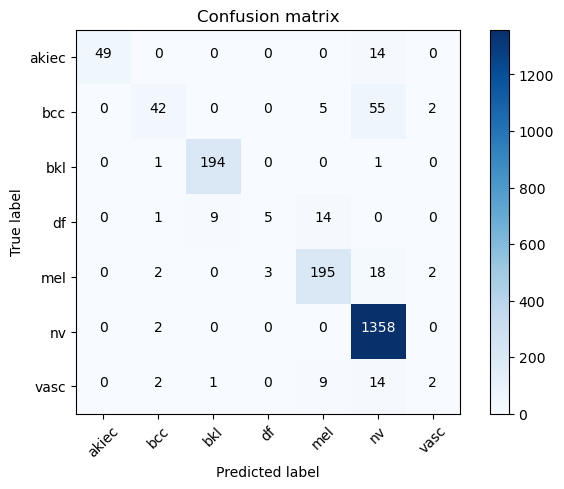

In [ ]:
# x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
# print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(X_test_scaled_n)
accuracy_score(y_test_n, y_pre_nn)
xp = confusion_matrix(y_test_n,y_pre_nn)
print(classification_report(y_test_n, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
plt.show()

1800 1800 200 200
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       1.00      0.29      0.44        14
           2       0.94      1.00      0.97        16
           3       0.00      0.00      0.00         2
           4       0.78      0.86      0.82        21
           5       0.89      1.00      0.94       134
           6       0.00      0.00      0.00         3

    accuracy                           0.89       200
   macro avg       0.66      0.52      0.55       200
weighted avg       0.88      0.89      0.86       200



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

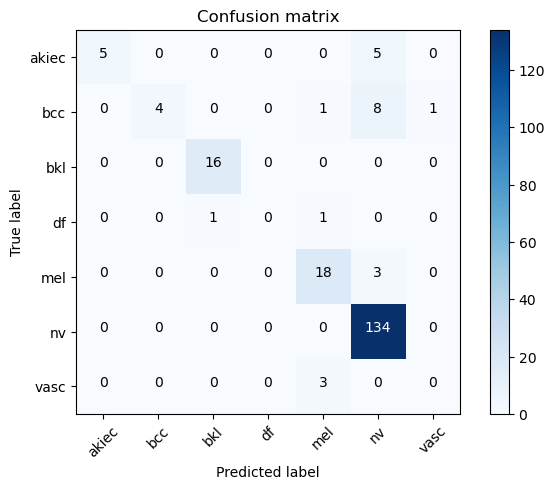

In [ ]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_combo_ring50_without_sampling.png', dpi = 100)
plt.show()

In [ ]:
y_pre_nn

array([5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 4, 5, 0, 5, 5, 2, 4, 1, 2, 2, 5, 4, 5, 5,
       5, 5, 5, 5, 5, 4, 0, 0, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 1, 5, 5, 5,
       5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 5, 5, 2, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 5, 6, 2, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 4, 2, 4, 5, 5, 4, 5, 5, 5, 2, 5, 1, 2, 5, 5, 4, 5, 4,
       5, 2])

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
# y_pred = np.argmax(y_pre_nn, axis=1)
# y_true = np.argmax(y_test_nn, axis=0)
# print(y_pred, y_true)
# print(y_pre_nn, y_test_nn.values)
roc_auc_score(y_test_nn.values, y_pre_nn, multi_class='ovr',average='weighted')

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
print("weighted Roc score: " + str(roc_auc_score(y_test_nn,y_pre_nn,multi_class='ovr',average='weighted')))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = clf.predict_proba(x_test_nn)
preds = probs[:,1]
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(7):
#     r = roc_auc_score(y_test_nn[:, i], probs[:, i])
#     # print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

fpr, tpr, _ = metrics.roc_curve(y_test_nn,  preds, pos_label=1)

# fpr, tpr, threshold = metrics.roc_curve(y_test_nn, preds)

metrics.roc_auc_score(y_test_nn, preds)
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, x_test_nn, y_test_nn) 


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.8 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 72.4 MB/s eta 0:00:00
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 89.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1


In [ ]:
import shap


/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test_scaled_n)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

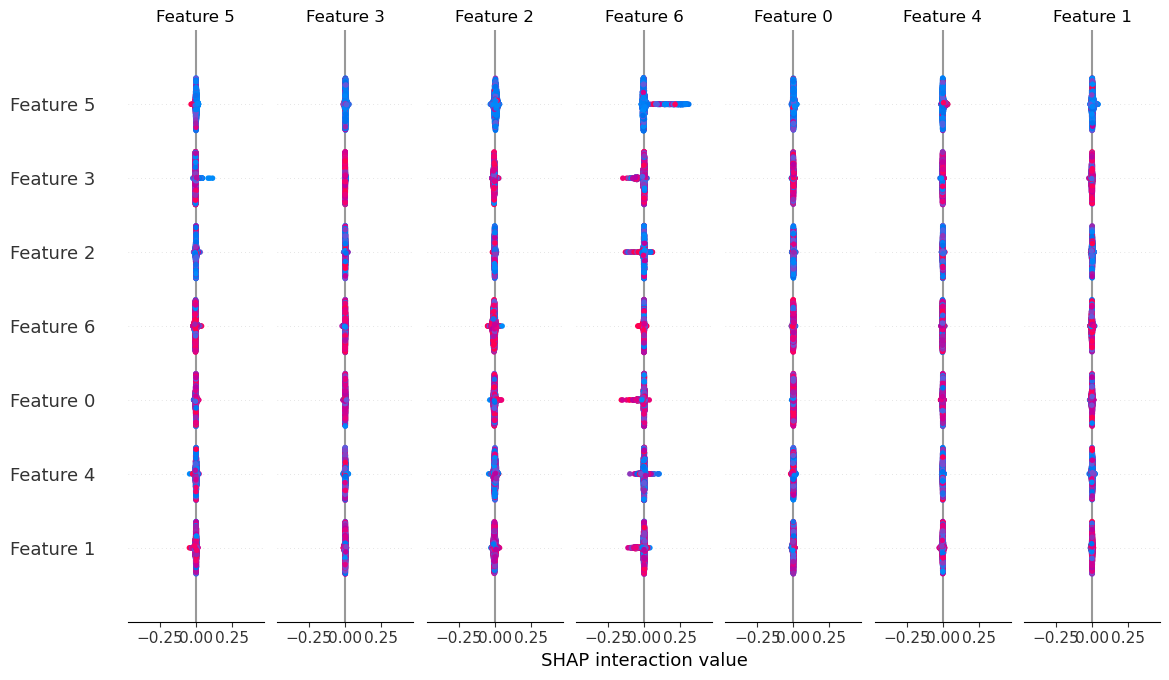

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test_scaled_n)

In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [20]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, X_train_scaled_n, y_resampled, cv=kf, scoring='r2')


In [23]:
scores

array([0.71786996, 0.71705033, 0.72226544, 0.69565551, 0.71033243])

In [60]:
type(y_train_n)

pandas.core.series.Series

In [68]:
 X_test_n

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
9446,120.0,205.0,5.956208e+09,5.917775,53.0,2.097421,243.0,165.386145,27.272207,168.0,...,1536.748627,0.000473,8.107641,0.417356,9.797826,0.916933,0.000230,3932.564505,0.077292,0.671338
898,27.0,133.0,5.935386e+08,5.849492,40.0,4.171551,233.0,63.658609,30.896194,50.0,...,851.757740,0.003316,7.926381,0.478568,5.118892,1.227217,0.000369,7888.292938,0.083944,3.837328
2398,147.0,194.0,2.300171e+09,5.118805,25.0,4.369092,211.0,173.670070,15.250187,178.0,...,1676.872983,0.000378,7.187833,0.474847,6.207678,0.652676,0.000309,3452.881368,0.052139,1.063994
5906,36.0,161.0,6.218827e+08,6.009163,75.0,2.134800,211.0,82.230833,40.639116,62.0,...,1229.570978,0.002249,8.271463,0.419534,14.175377,0.735811,0.000757,3743.341963,0.141888,3.537108
2343,186.0,207.0,2.771617e+08,4.128086,11.0,6.160125,226.0,196.007918,6.833121,196.0,...,527.581150,0.001819,6.194981,0.473399,5.129095,0.376324,0.001547,1363.269212,0.034406,1.717913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,9.0,95.0,5.824381e+08,5.301526,29.0,5.106020,235.0,36.803776,26.586782,22.0,...,677.426282,0.004469,8.514344,0.232757,327.650581,3.578143,0.000200,3990.036661,0.046294,2.680615
2899,212.0,254.0,2.483979e+09,4.712144,27.0,2.797404,255.0,233.912136,13.799589,235.0,...,979.120435,0.000667,6.663181,0.473213,387.761603,1.002645,0.000392,1993.377115,0.078273,0.756233
9548,178.0,212.0,2.812336e+09,4.721919,19.0,2.682557,246.0,195.316771,10.471260,196.0,...,315.458237,0.001815,7.312288,0.342480,14.895880,2.315236,0.000338,988.598164,0.036547,0.314749
2740,98.0,224.0,2.117368e+09,6.245172,73.0,2.372484,242.0,173.743925,40.448762,188.0,...,2454.301425,0.000808,8.456276,0.439438,6.678850,0.142281,0.000997,4167.781713,0.122161,4.611647


In [71]:
X_test_n[1]

KeyError: 1

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)



# Assuming X is your feature matrix and y is your target labels

kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X,y):
    # print(train_ind, te)

    print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X_test_n.iloc[train_ind,:], X_test_n.iloc[test_ind,:]
    y_train,y_test = y_test_n[train_ind], y_test_n[test_ind]
    clf.fit(X_train,y_train)
    pred_values = clf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)
    xp = confusion_matrix(y_test,pred_values)
    print(classification_report(y_test, pred_values))
    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
    # plot_confusion_matrix(xp, plot_labels)
    # plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
    plt.show()
avg_acc_score = sum(acc_score_kfold)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold))
print('Avg accuracy : {}'.format(avg_acc_score))

Train: [   1    3    6 ... 9995 9997 9998] Test: [   0    2    4 ... 9993 9994 9996]


InvalidIndexError: (array([   1,    3,    6, ..., 9995, 9997, 9998]), slice(None, None, None))

In [83]:
from sklearn.model_selection import StratifiedKFold



# Assuming X is your feature matrix and y is your target labels

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X_train_scaled_n,y_resampled):
    print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X_train_scaled_n[train_ind,:], X_train_scaled_n[test_ind,:]
    y_train,y_test = y_resampled[train_ind], y_resampled[test_ind]
    
    clf.fit(X_train,y_train)
    pred_values = clf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)
    xp = confusion_matrix(y_test,pred_values)
    print(classification_report(y_test, pred_values))
    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
    # plot_confusion_matrix(xp, plot_labels)
    # plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
    plt.show()
avg_acc_score = sum(acc_score_kfold)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold))
print('Avg accuracy : {}'.format(avg_acc_score))

Train: [    0     1     2 ... 37377 37378 37379] Test: [    6    11    14 ... 37363 37372 37376]


KeyboardInterrupt: 

In [84]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)



# Assuming X is your feature matrix and y is your target labels

kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X,y):
    # print(train_ind, te)
    # X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)

    print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X_test_n.iloc[train_ind,:], X_test_n.iloc[test_ind,:]
    y_train,y_test = y_test_n[train_ind], y_test_n[test_ind]
    clf.fit(X_train,y_train)
    pred_values = clf.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)
    xp = confusion_matrix(y_test,pred_values)
    print(classification_report(y_test, pred_values))
    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
    # plot_confusion_matrix(xp, plot_labels)
    # plt.savefig('../presentation/conf_mat_rfc_combo_ring50_smote_oversampling.png', dpi = 100)
    plt.show()
avg_acc_score = sum(acc_score_kfold)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold))
print('Avg accuracy : {}'.format(avg_acc_score))

Train: [   1    3    6 ... 9995 9997 9998] Test: [   0    2    4 ... 9993 9994 9996]


IndexError: positional indexers are out-of-bounds

In [ ]:
# X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=0)

# Assuming X is your feature matrix and y is your target labels

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  
acc_score_kfold = []

for train_ind,test_ind in kf.split(X,y):
    #print("Train:",train_ind,'Test:',test_ind)
    X_train,X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train,y_test = y[train_ind], y[test_ind]
    
    x_resampled, y_resampled = smt.fit_resample(X_train, y_train)

    #scaling and centering the data
    sc = StandardScaler()
    X_train_scaled_n = sc.fit_transform(x_resampled)
    X_test_scaled_n = sc.transform(X_test)
    clf.fit(X_train_scaled_n,y_resampled)
    pred_values = clf.predict(X_test_scaled_n)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score_kfold.append(acc)
    xp = confusion_matrix(y_test,pred_values)
    print(classification_report(y_test, pred_values))
    plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

avg_acc_score = sum(acc_score_kfold)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold))
print('Avg accuracy : {}'.format(avg_acc_score))

              precision    recall  f1-score   support

       akiec       0.04      0.06      0.05        32
         bcc       0.06      0.08      0.07        52
         bkl       0.08      0.10      0.09       110
          df       0.00      0.00      0.00        12
         mel       0.17      0.15      0.16       110
          nv       0.66      0.62      0.64       670
        vasc       0.00      0.00      0.00        14

    accuracy                           0.45      1000
   macro avg       0.15      0.14      0.14      1000
weighted avg       0.47      0.45      0.46      1000

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        32
         bcc       0.05      0.08      0.06        52
         bkl       0.11      0.09      0.10       110
          df       0.00      0.00      0.00        12
         mel       0.09      0.08      0.08       110
          nv       0.65      0.61      0.63       670
        vasc       0.04 